<a href="https://colab.research.google.com/github/Abdelrahman-Wael-1029/Supervised_assignments/blob/main/assignment%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries for MNIST
from keras.datasets import mnist
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.feature import hog
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_validate

11490434/11490434 [==============================] - 0s 0us/step
Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


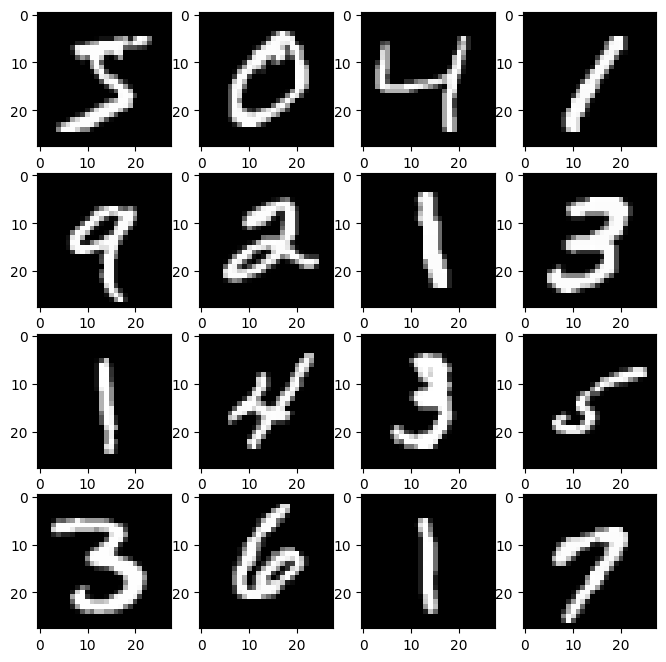

In [ ]:
# Load the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Print the shapes of each dataset split
print(f"Train data shape: {train_X.shape}")
print(f"Test data shape: {test_X.shape}")

# Plotting
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
def extract_hog_features(images):
    features = []
    for image in images:
      fd = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2))
      features.append(fd)
    return np.array(features)

train_X_hog = extract_hog_features(train_X)
test_X_hog = extract_hog_features(test_X)
# Plotting
train_X_hog.shape

(60000, 1152)

In [ ]:
# **Architecture 1:** Deep Network with Dropout

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(train_X_hog.shape[1],)))
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# **Architecture 2:** Wide Network

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(train_X_hog.shape[1],)))
model2.add(tf.keras.layers.Dense(512, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# **Architecture 3:** Network with Batch Normalization

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=(train_X_hog.shape[1],)))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

# **Architecture 4:** Network with L2 Regularization

model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Flatten(input_shape=(train_X_hog.shape[1],)))
model4.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model4.add(tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

In [ ]:

loss_fn1 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer1 = tf.keras.optimizers.Adam()

loss_fn2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer2 = tf.keras.optimizers.Adam()

loss_fn3 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer3 = tf.keras.optimizers.Adam()

loss_fn4 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer4 = tf.keras.optimizers.Adam()

# Compile each model
model1.compile(loss=loss_fn1, optimizer=optimizer1, metrics=['accuracy'])
model2.compile(loss=loss_fn2, optimizer=optimizer2, metrics=['accuracy'])
model3.compile(loss=loss_fn3, optimizer=optimizer3, metrics=['accuracy'])
model4.compile(loss=loss_fn4, optimizer=optimizer4, metrics=['accuracy'])


In [ ]:
model1.summary()
print()
model2.summary()
print()
model3.summary()
print()
model4.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1152)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               295168    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 329354 (1.26 MB)
Trainable params: 32935

In [ ]:

def predict(model, sample):
  prediction = model.predict(np.expand_dims(sample, axis=0))
  print(f"Predicted class: {np.argmax(prediction)}")

for i in range(16):
  predict(model1, test_X_hog[i])
  predict(model2, test_X_hog[i])
  predict(model3, test_X_hog[i])
  predict(model4, test_X_hog[i])
  print(test_y[i])
  print()


1/1 [==============================] - 0s 56ms/step
Predicted class: 7
1/1 [==============================] - 0s 214ms/step
Predicted class: 7
1/1 [==============================] - 0s 344ms/step
Predicted class: 7
1/1 [==============================] - 0s 265ms/step
Predicted class: 7
7

1/1 [==============================] - 0s 79ms/step
Predicted class: 2
1/1 [==============================] - 0s 43ms/step
Predicted class: 2
1/1 [==============================] - 0s 89ms/step
Predicted class: 2
1/1 [==============================] - 0s 65ms/step
Predicted class: 2
2

1/1 [==============================] - 0s 68ms/step
Predicted class: 1
1/1 [==============================] - 0s 36ms/step
Predicted class: 1
1/1 [==============================] - 0s 35ms/step
Predicted class: 1
1/1 [==============================] - 0s 34ms/step
Predicted class: 1
1

1/1 [==============================] - 0s 40ms/step
Predicted class: 0
1/1 [==============================] - 0s 36ms/step
Predicted cla

In [ ]:

# Train and evaluate each model
models = [model1, model2, model3, model4]

for model in models:
  model.fit(train_X_hog, train_y, epochs=10,batch_size=32)
  test_loss, test_acc = model.evaluate(test_X_hog, test_y)
  print(f"Model: {model.name}, Test loss: {test_loss}, Test accuracy: {test_acc}")
  print()

# Choose the best model based on the test accuracy
best_model = max(models, key=lambda model: model.evaluate(test_X_hog, test_y)[1])

print(f"Best model: {best_model.name}")

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1475 - accuracy: 0.9550
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0682 - accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0501 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0416 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0336 - accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0293 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0244 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0214 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

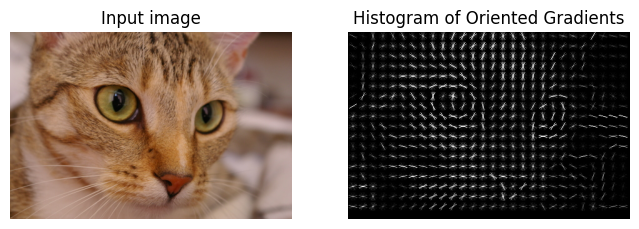

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.cat()


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

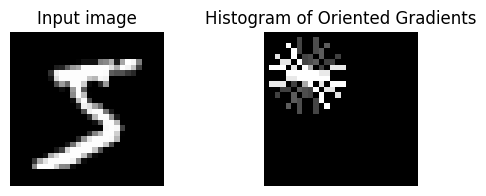

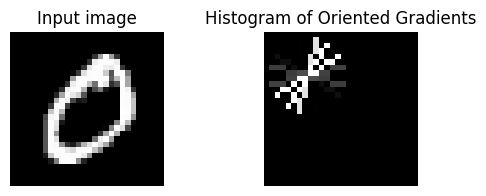

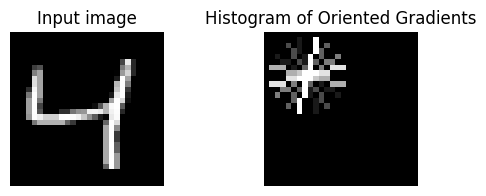

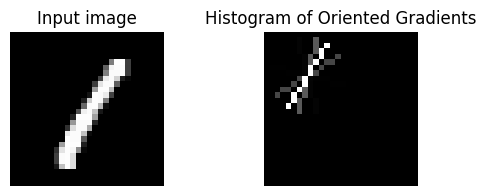

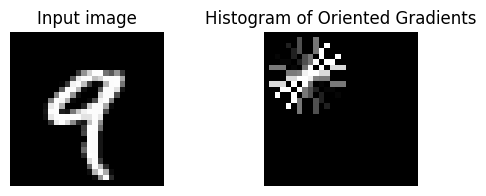

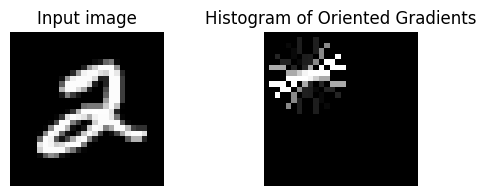

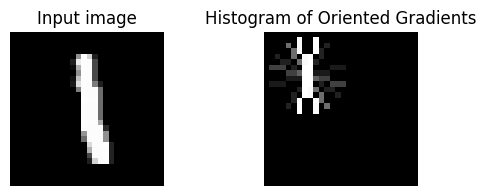

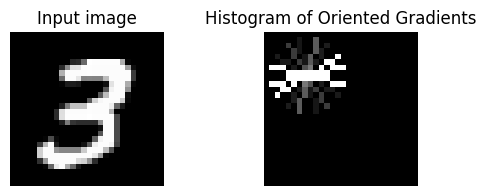

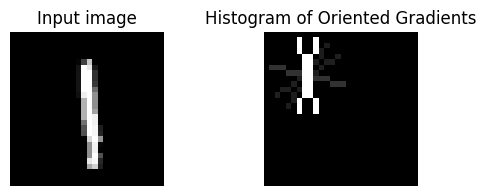

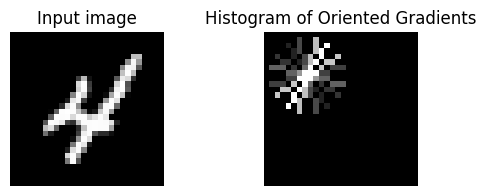

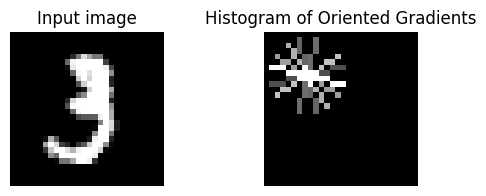

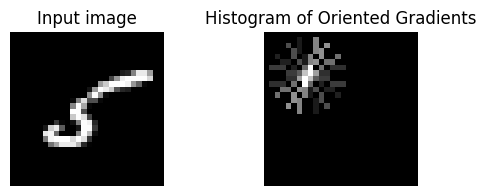

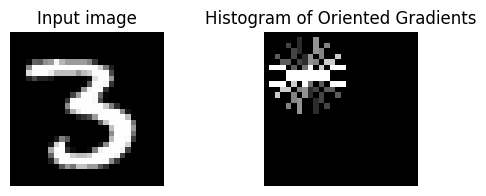

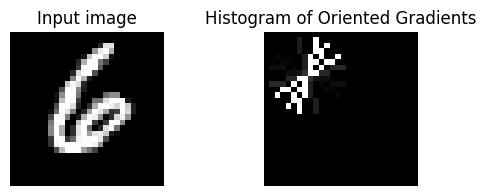

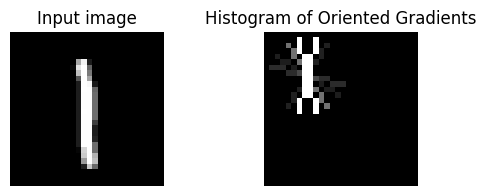

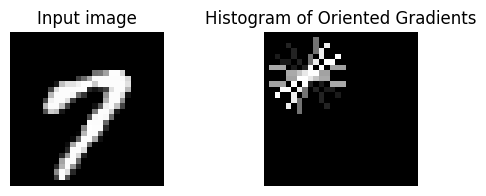

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

for i in range(16):
  image = train_X[i]

  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, )

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2), sharex=True, sharey=True)
  ax1.axis('off')
  ax1.imshow(image, cmap=plt.cm.gray)
  ax1.set_title('Input image')

  # Rescale histogram for better display
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  ax2.axis('off')
  ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  ax2.set_title('Histogram of Oriented Gradients')
  plt.show()